
# <span style="color:rgb(213,80,0)">Exercise 6.5</span>

Score test and fan plot 1. This file creates Figures A.21-A.23 and Tables A.8-A.10.

## D1 Data loading

In [1]:
XX=load('D1.txt');
X=XX(:,1:end-1);
y=XX(:,end);
n=length(y);
prin=0;

## Create Figure A.21

D1 yXplot



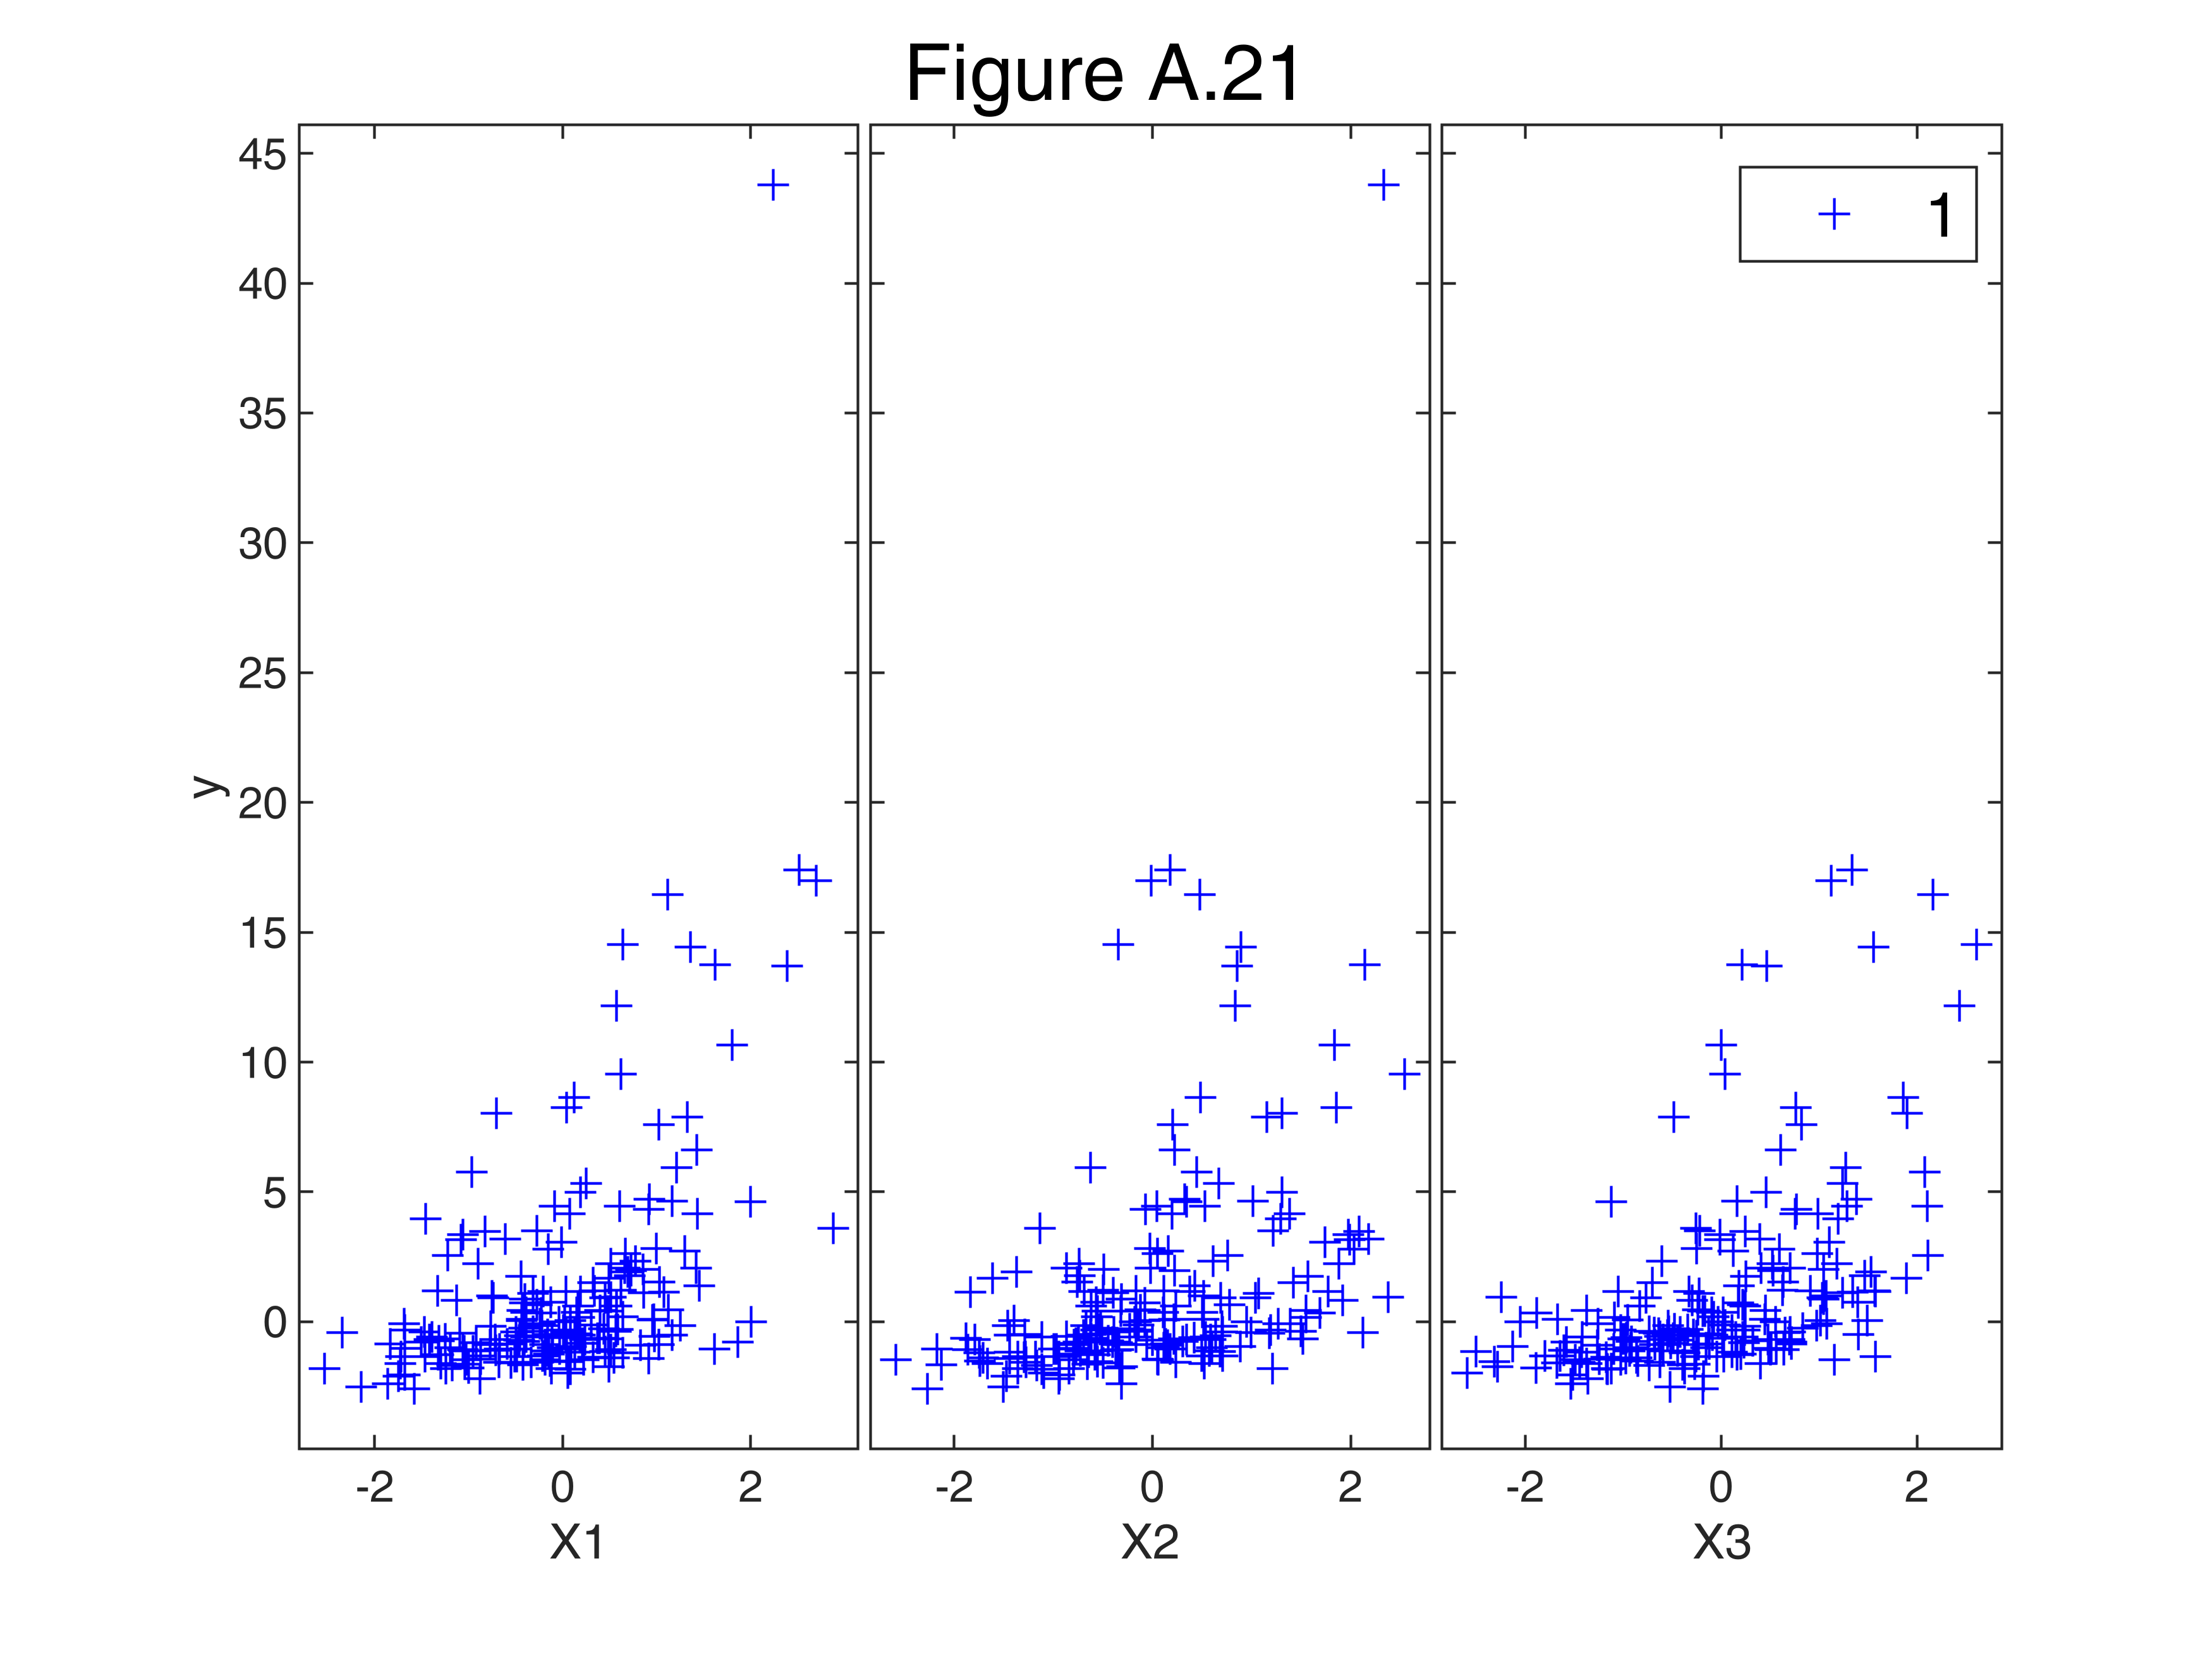

In [2]:
yXplot(y,X,'tag','pl_yini');
sgtitle('Figure A.21')
set(gcf,"Name",'Figure A.21')

In [3]:

if prin==1
    print -depsc figs\D1yX.eps
end

## Create Table A.8

In [4]:
disp('Table A.8: ANOVA in the original scale for y')

Table A.8: ANOVA in the original scale for y

In [5]:
outl=fitlm(X,y);
disp(outl)

Linear regression model:
    y ~ 1 + x1 + x2 + x3
Estimated Coefficients:
                   Estimate      SE       tStat       pValue  
                   ________    _______    ______    __________
    (Intercept)      1.474     0.21501    6.8556    9.0202e-11
    x1              2.2605     0.21645    10.443    1.3969e-20
    x2               1.895     0.20203    9.3799     1.673e-17
    x3               2.002     0.20459    9.7853    1.1552e-18
Number of observations: 200, Error degrees of freedom: 196
Root Mean Squared Error: 3.04
R-squared: 0.604,  Adjusted R-Squared: 0.598
F-statistic vs. constant model: 99.5, p-value = 3.57e-39

## Create Table A.9

Score test


In [6]:
la=-1:0.25:1;
outS=ScoreYJ(y,X,'la',la);
varn=["lambda" "Score test"];
ScoreT=array2table([la' outS.Score],'VariableNames',varn);
disp("Table A.9")

Table A.9

In [7]:
disp(ScoreT)

    lambda    Score test
    ______    __________
       -1         57.83 
    -0.75        46.775 
     -0.5        34.711 
    -0.25        22.188 
        0         10.39 
     0.25      -0.89322 
      0.5       -14.688 
     0.75       -33.232 
        1       -51.802

## Create Figure A.22 (left panel)

D1 fanplot just one lambda



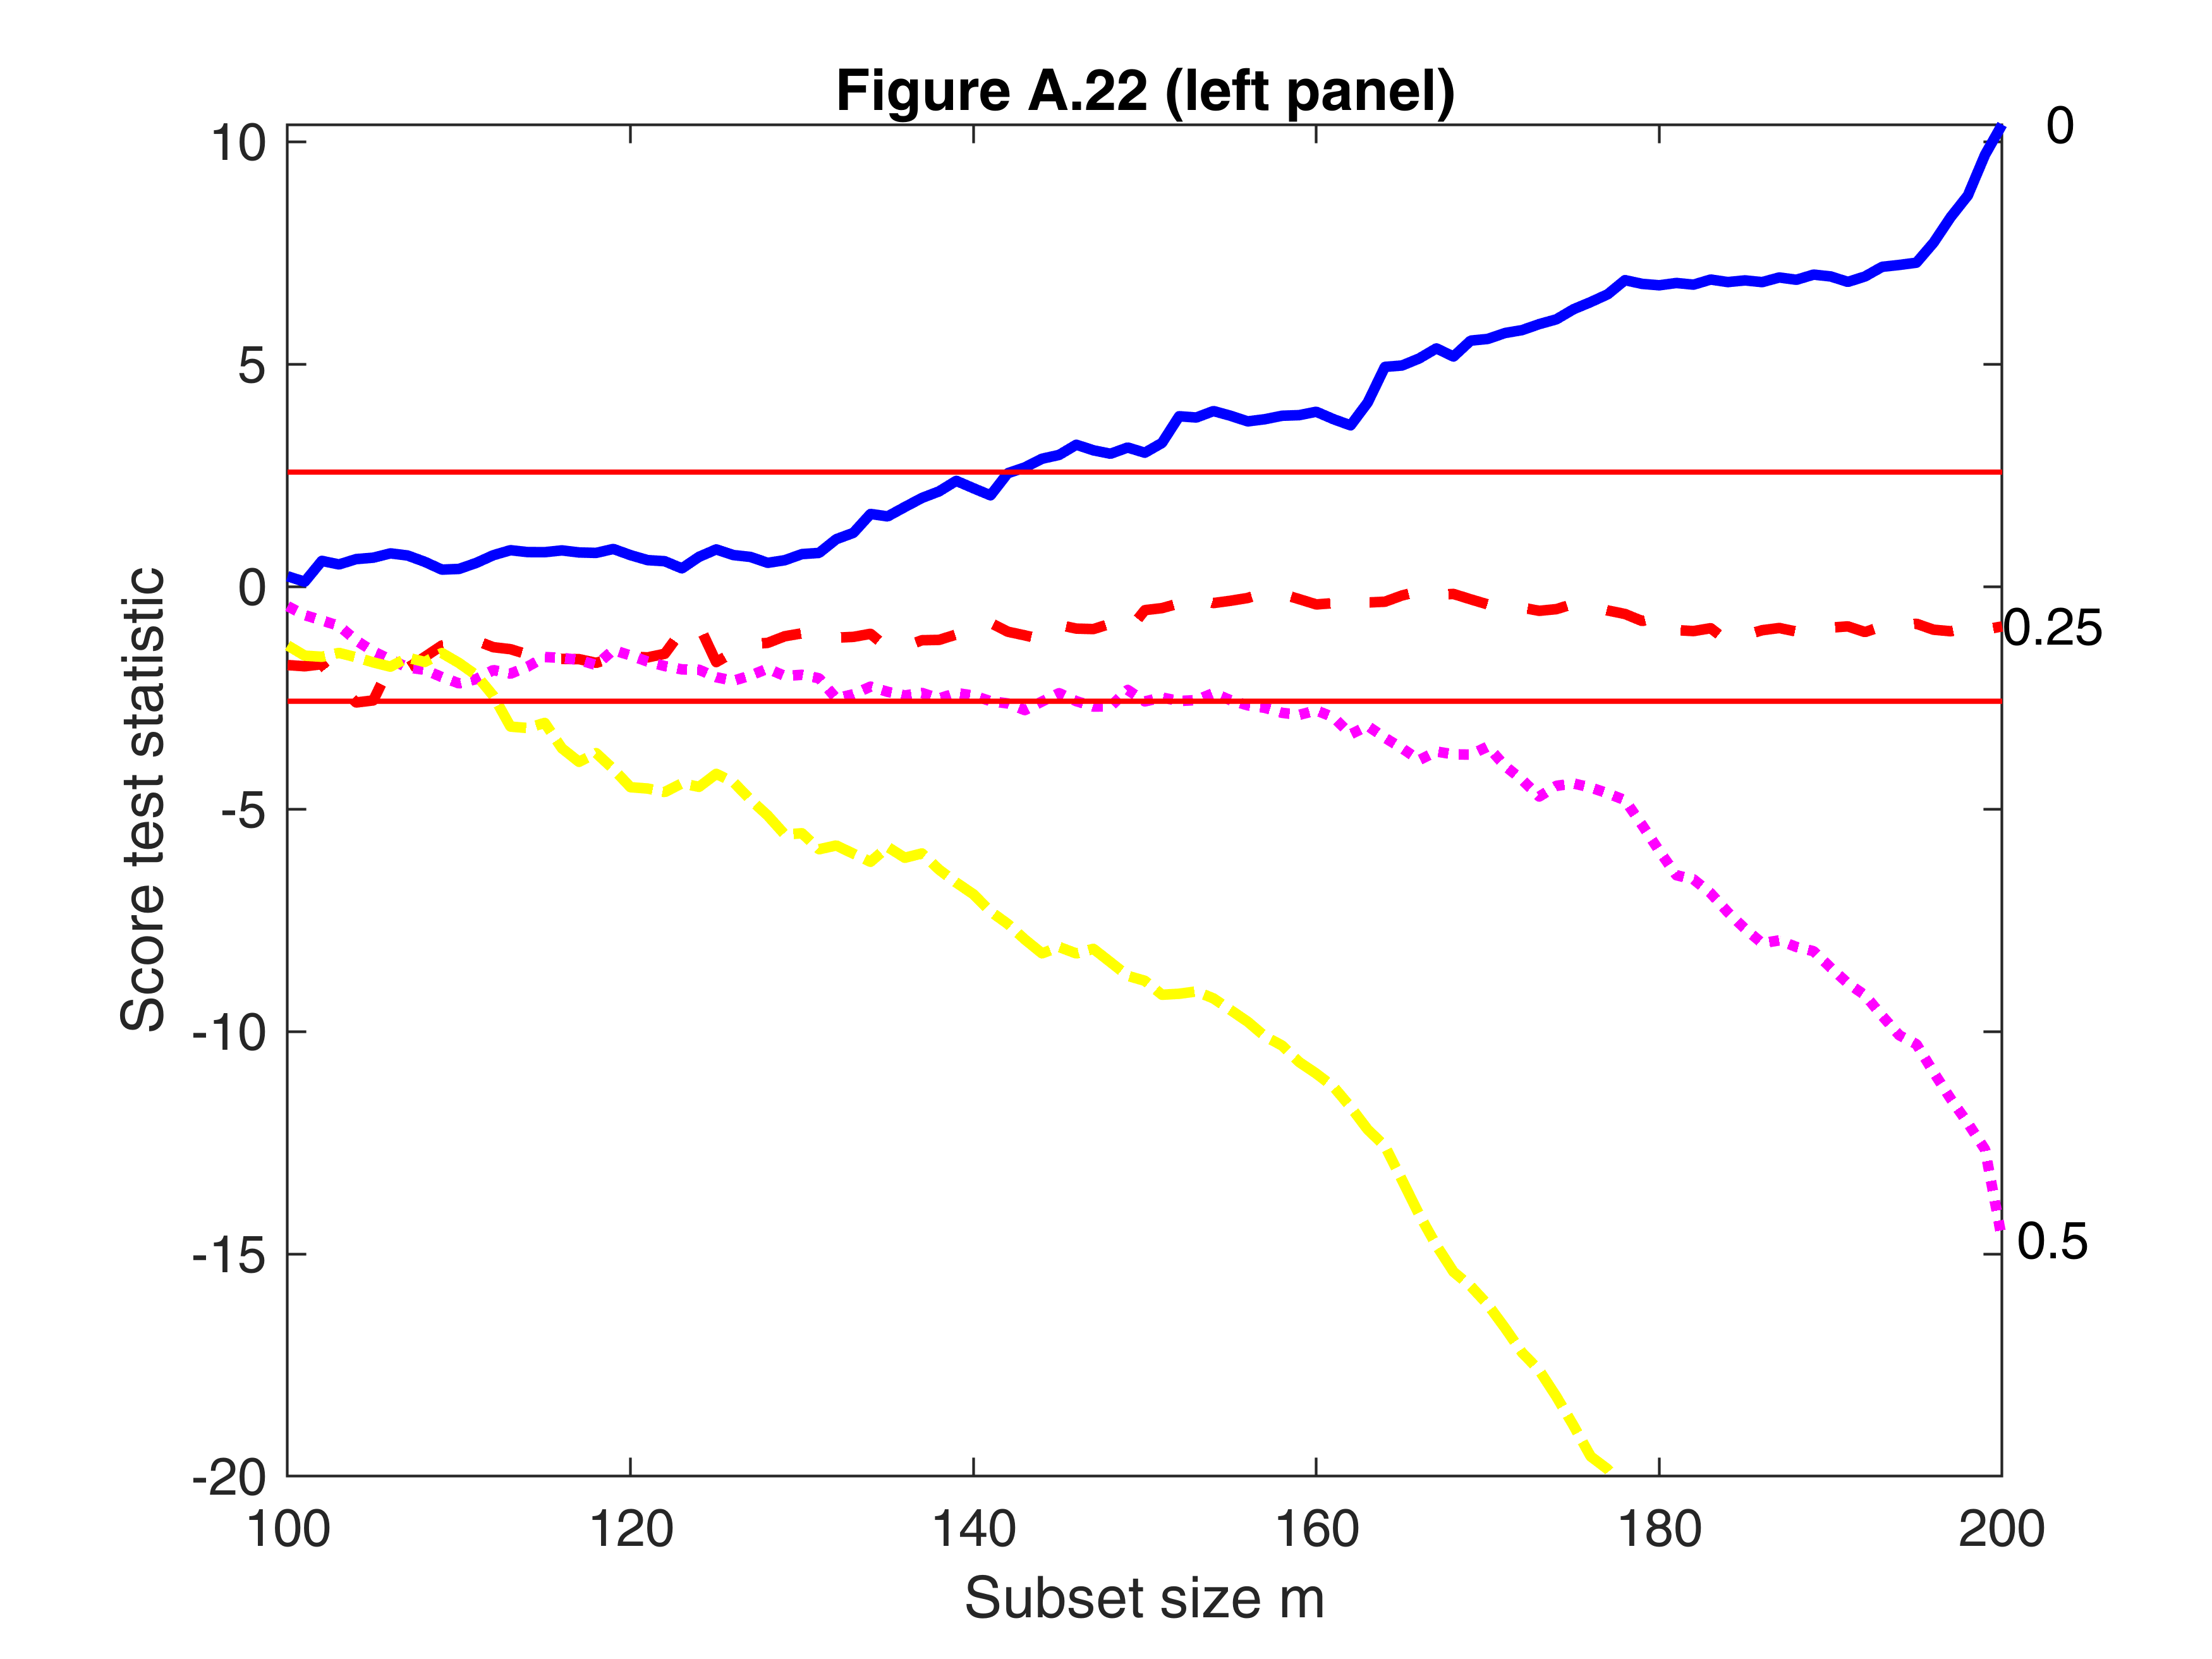

In [8]:
la=[0 0.25 0.5 1];
ylimy='';
out=FSRfan(y,X,'la',la,'family','YJ','plots',1,'init',round(n/2),'ylimy',[-ylimy ylimy],'msg',0);
title('Figure A.22 (left panel)')
set(gcf,"Name",'Figure A.22 (left panel)')

In [9]:

if prin==1
    print -depsc figs\D1fan.eps
end

## Create Figure A.22 (right panel)

D1 fanplotpn



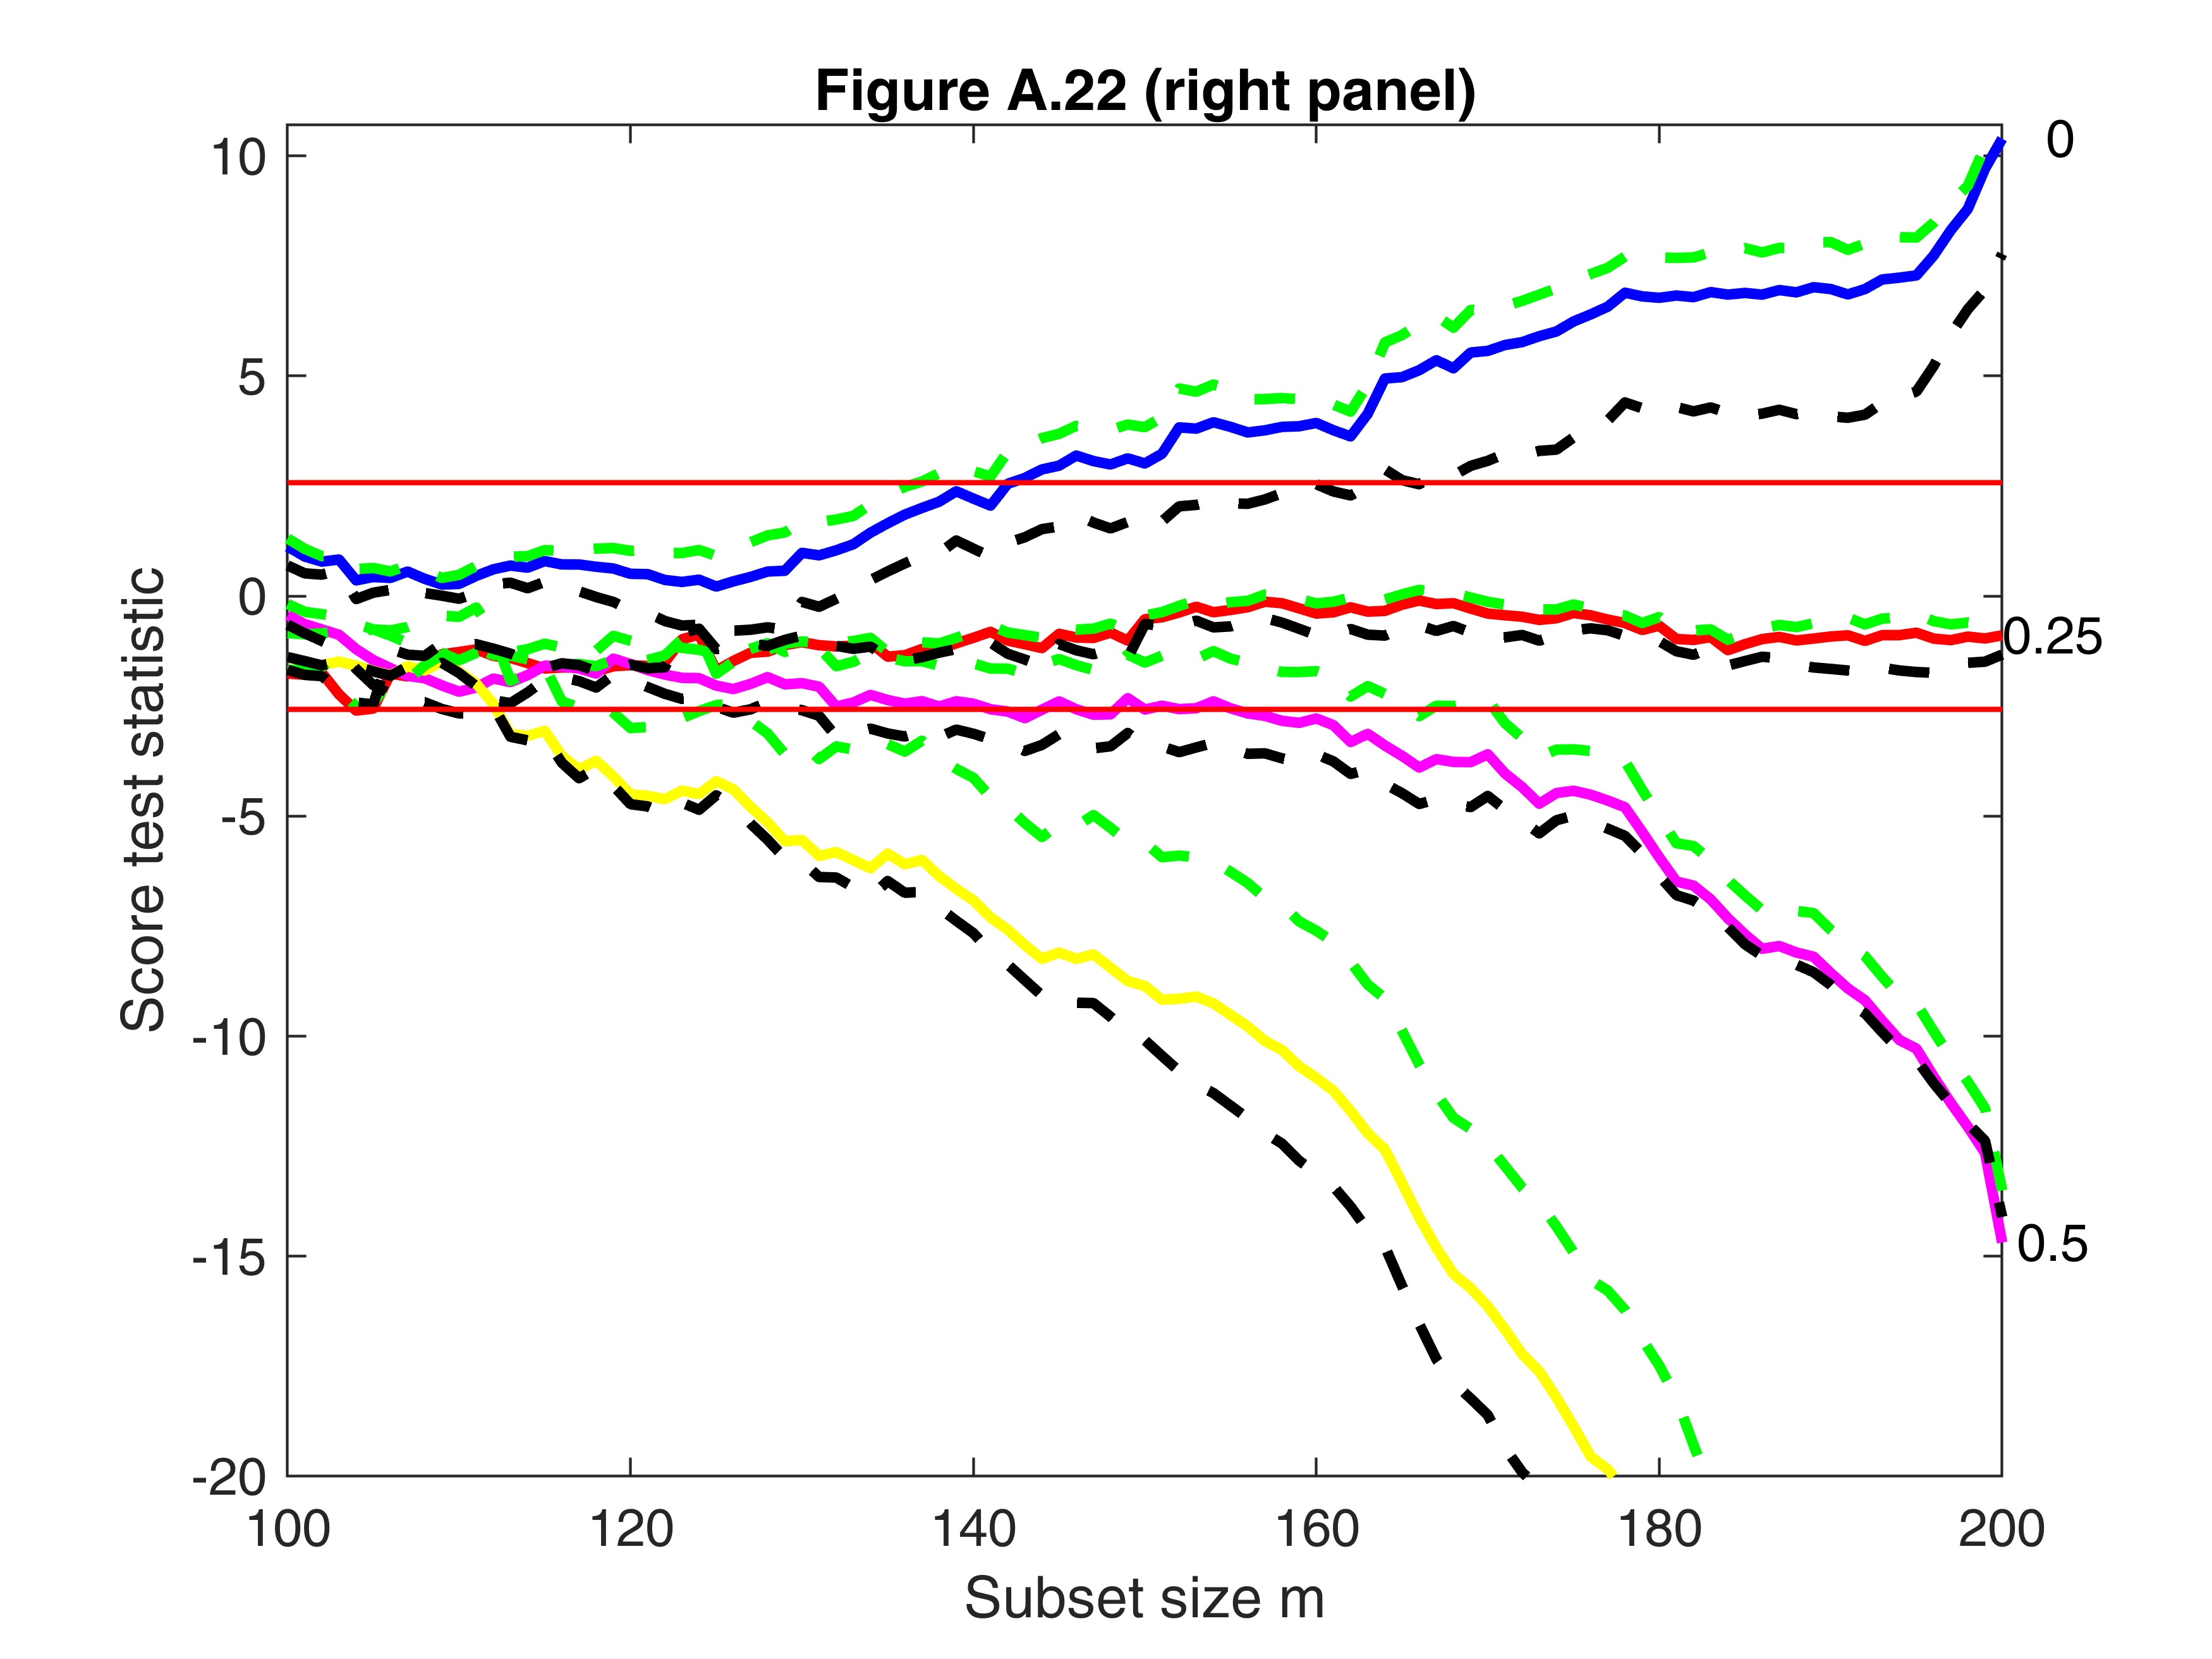

In [10]:
la=[0 0.25 0.5 1];
ylimy='';
out=FSRfan(y,X,'la',la,'family','YJpn','plots',1,'init',round(n/2), ...
    'ylimy',[-ylimy ylimy],'msg',0,'tag','pl_scopn');
title('Figure A.22 (right panel)')
set(gcf,"Name",'Figure A.22 (right panel)')

In [11]:

if prin==1
    print -depsc figs\D1fanpn.eps
end

## Create Figure A.23

yXplot after transforming y


In [12]:
labest=0.25;
ytra=normYJ(y,[],labest,'inverse',false);
yXplot(ytra,X)

ans = 
  1x3 Line array:
    Line    Line    Line


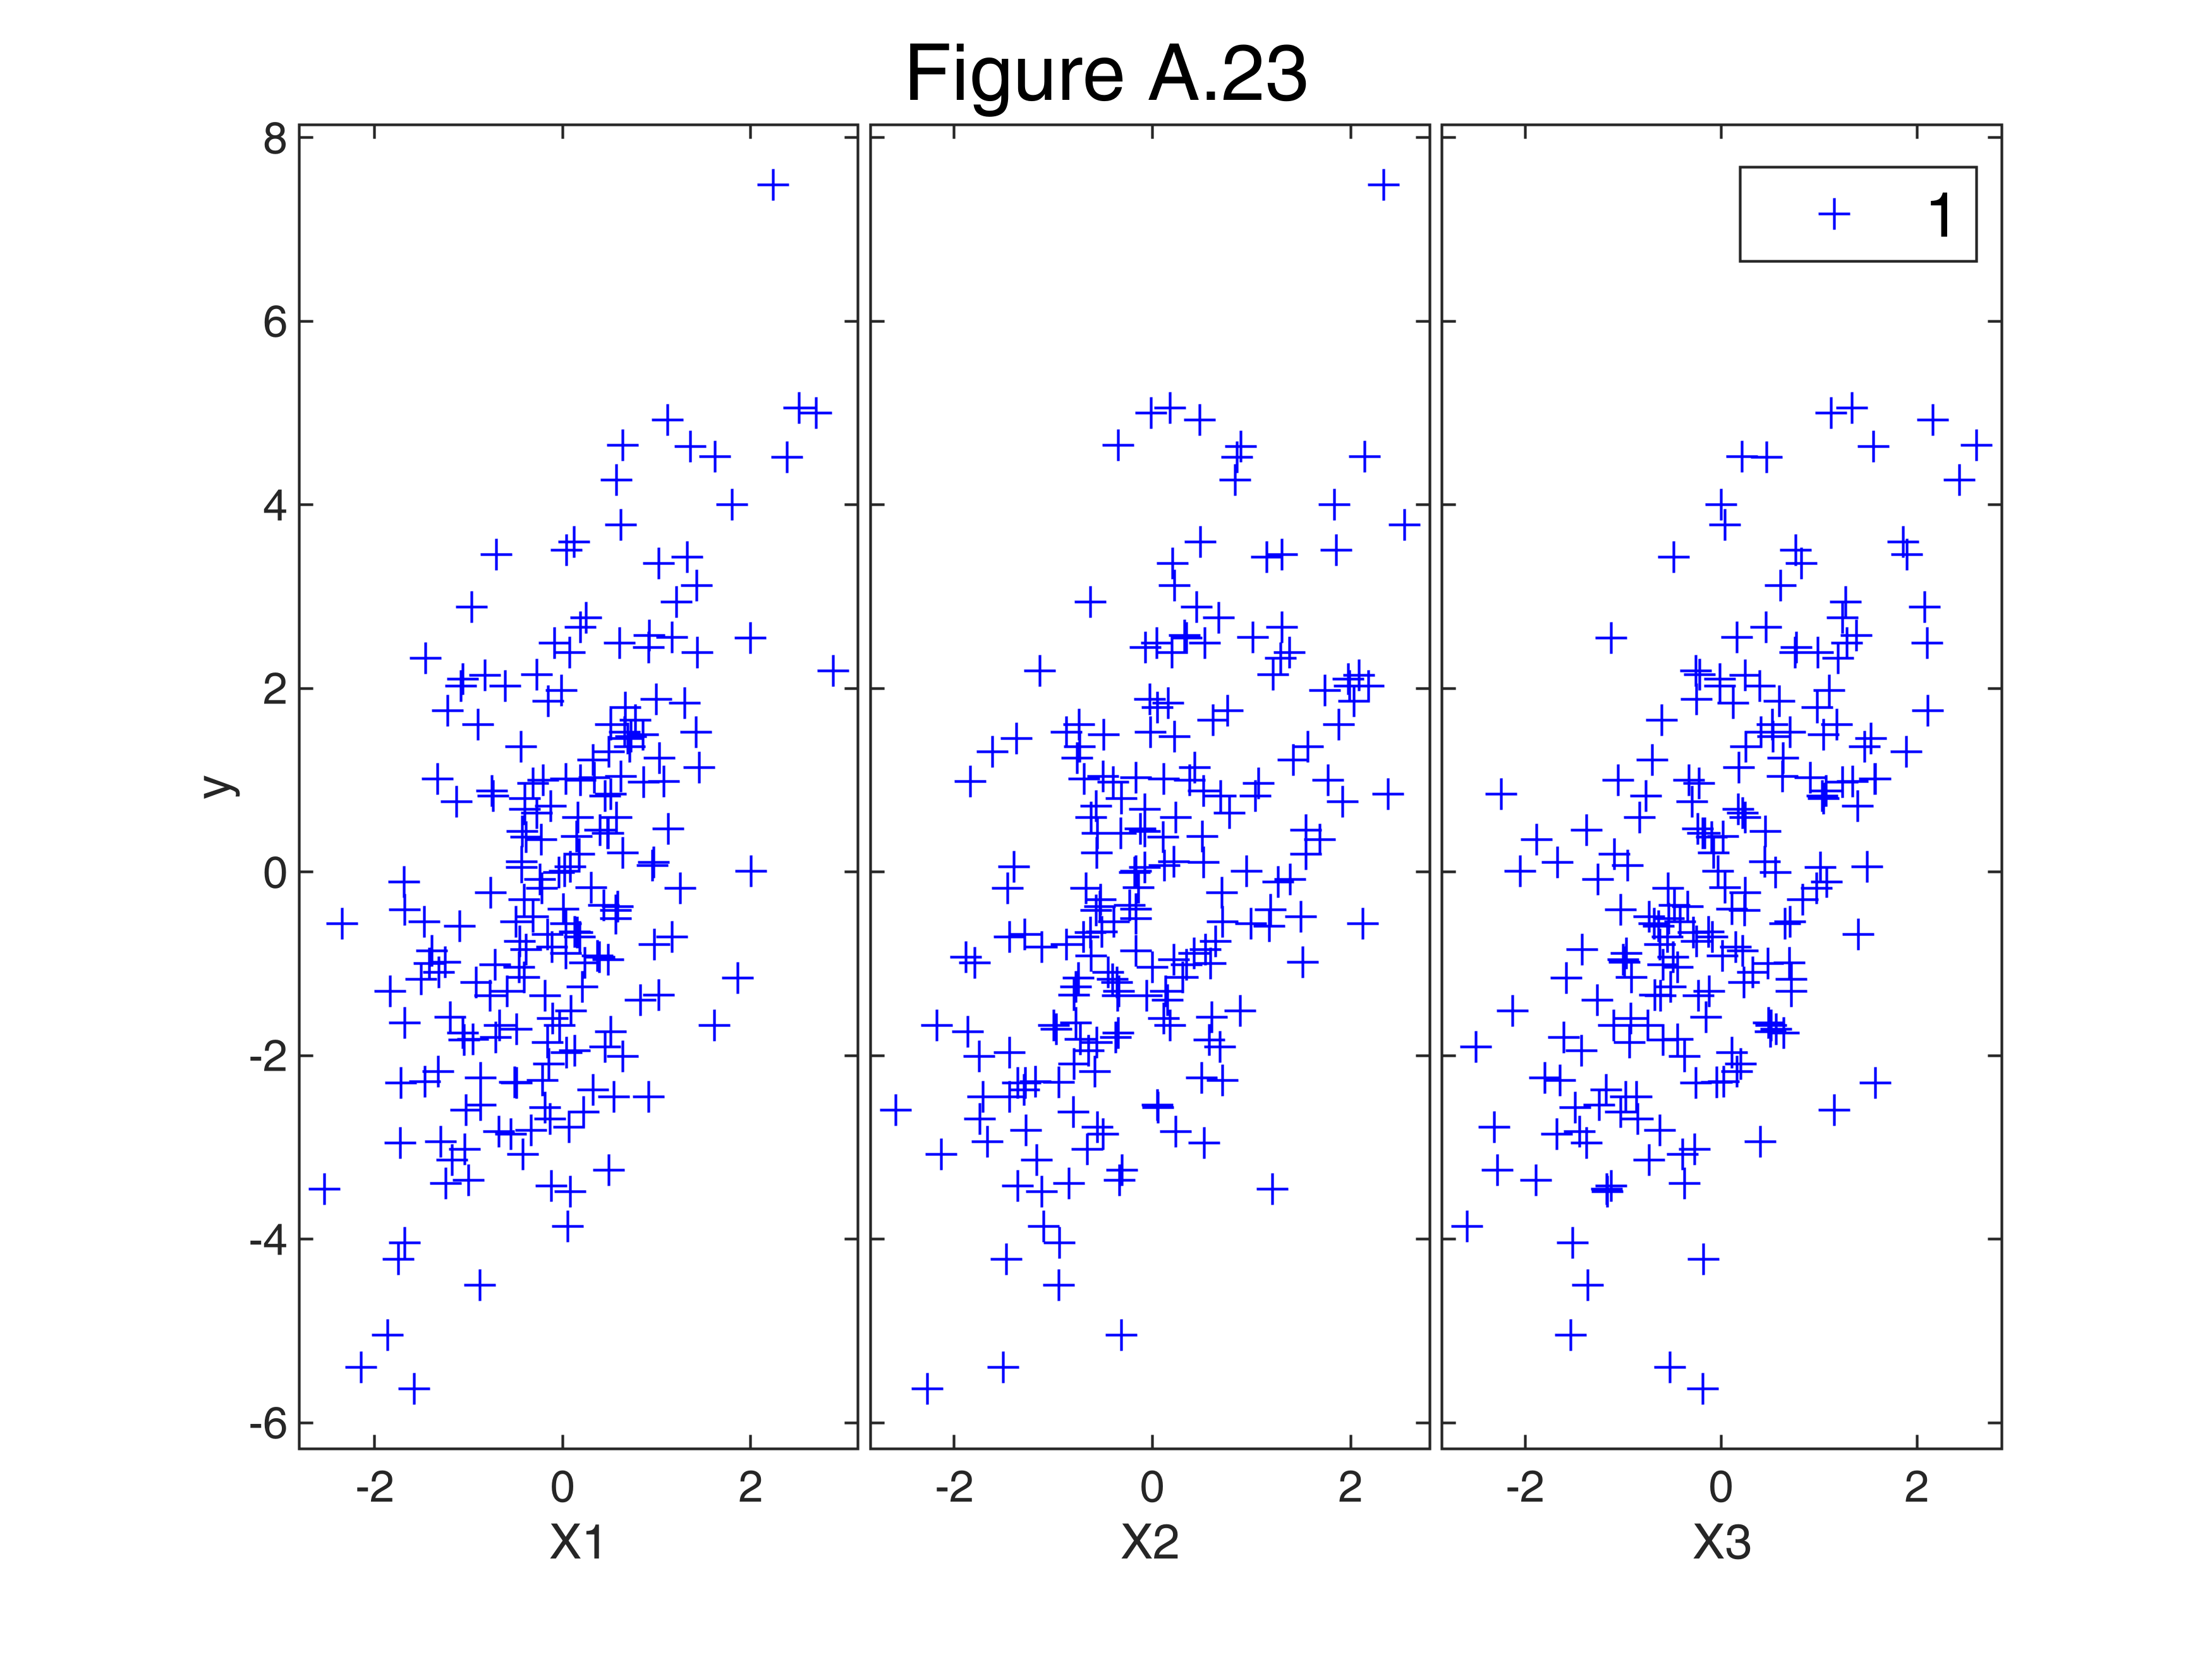

In [13]:
sgtitle('Figure A.23')
set(gcf,"Name",'Figure A.23')

In [14]:

if prin==1
    print -depsc figs\D1ytraX.eps
end

## Create table A.10

Anova table after transforming y


In [15]:
disp('Table A.10: ANOVA in the transformed scale for y')

Table A.10: ANOVA in the transformed scale for y

In [16]:
outTRA=fitlm(X,ytra);
disp(outTRA)

Linear regression model:
    y ~ 1 + x1 + x2 + x3
Estimated Coefficients:
                    Estimate        SE        tStat        pValue  
                   __________    ________    ________    __________
    (Intercept)    -0.0067019     0.04161    -0.16107       0.87221
    x1                 1.1927    0.041887      28.474    1.4341e-71
    x2                 1.1779    0.039097      30.128    1.7303e-75
    x3                 1.2068    0.039593      30.479    2.6612e-76
Number of observations: 200, Error degrees of freedom: 196
Root Mean Squared Error: 0.588
R-squared: 0.932,  Adjusted R-Squared: 0.931
F-statistic vs. constant model: 897, p-value = 3.66e-114

## D1 automatic procedure

In [17]:
[outFSRfan]=FSRfan(y,X,'plots',0,'init',round(n*0.3),'nsamp',10000,'la',[0 0.25 0.5 0.75 1 1.25],'msg',0,'family','YJ');
[outini]=fanBIC(outFSRfan,'plots',0);
% labest is the best value imposing the constraint that positive and
% negative observations must have the same tramsformation parameter.
labest=outini.labest;
[outFSRfanpn]=FSRfan(y,X,'msg',0,'family','YJpn','la',labest,'plots',0);
out1=fanBICpn(outFSRfanpn,'plots',0);

Analyzing la_P=0.25 and la_N=-0.25
Analyzing la_P=0.25 and la_N=0
Analyzing la_P=0.25 and la_N=0.25
Analyzing la_P=0.25 and la_N=-0.5
Analyzing la_P=0.5 and la_N=-0.25
Analyzing la_P=0.5 and la_N=0
Analyzing la_P=0.5 and la_N=0.25
Analyzing la_P=0.5 and la_N=-0.5
Analyzing la_P=0.75 and la_N=-0.25
Analyzing la_P=0.75 and la_N=0
Analyzing la_P=0.75 and la_N=0.25
Analyzing la_P=0.75 and la_N=-0.5
Analyzing la_P=1 and la_N=-0.25
Analyzing la_P=1 and la_N=0
Analyzing la_P=1 and la_N=0.25
Analyzing la_P=1 and la_N=-0.5

In [18]:
disp('Best value of lambda from the automatic procedure')

Best value of lambda from the automatic procedure

In [19]:
disp(["laP" "laN"])

    "laP"    "laN"

In [20]:
disp(out1.labestBIC);

    0.2500    0.2500

In [21]:

%InsideREADME